In [39]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

In [40]:
def str_to_qc(bit_string):
    qc_temp = QuantumCircuit(len(bit_string))
    for i in range(len(bit_string)):
        if bit_string[i] == '1':
            qc_temp.x(len(bit_string) - 1 - i)
    return qc_temp

C:\Users\pmang\AppData\Local\Temp/ipykernel_8048/3216353255.py:5: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += qc_input


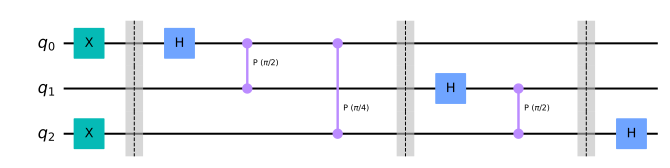

In [41]:
bit_string = '101'
qc_input = str_to_qc(bit_string)

qc = QuantumCircuit(3)
qc += qc_input
qc.barrier()
qc.h(0)
qc.cp(pi/2, 1, 0)
qc.cp(pi/4, 2, 0)
qc.barrier()
qc.h(1)
qc.cp(pi/2, 2, 1)
qc.barrier()
qc.h(2)
qc.draw()

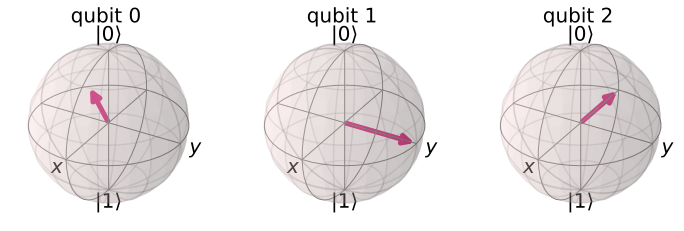

In [45]:
qc_qft = qc.copy()
aer_sim = Aer.get_backend('aer_simulator')
qc_qft.save_statevector()
statevector = aer_sim.run(qc_qft).result().get_statevector()
plot_bloch_multivector(statevector)

In [43]:
#plot_bloch_multivector(statevector)

## Inverse Quantum Fourier Transform

In [6]:
def inverse_qft(circuit, n):
    global qc
    qft_circ = qc
    invqft_circ = qft_circ.inverse()
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose()

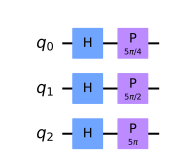

In [7]:
nqubits = 3
number = 5

qc2 = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc2.h(qubit)

qc2.p(number*pi, 2)
qc2.p(number*pi/2, 1)
qc2.p(number*pi/4, 0)

qc2.draw()

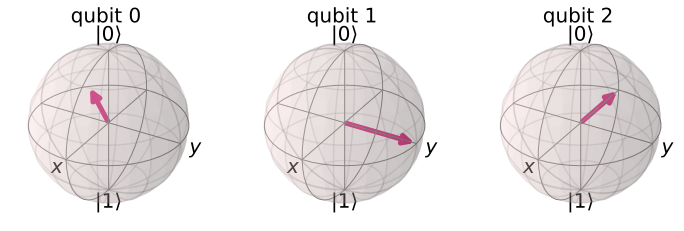

In [8]:
qc_init = qc2.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
result = sim.run(qc_init).result()
plot_bloch_multivector(result.get_statevector())

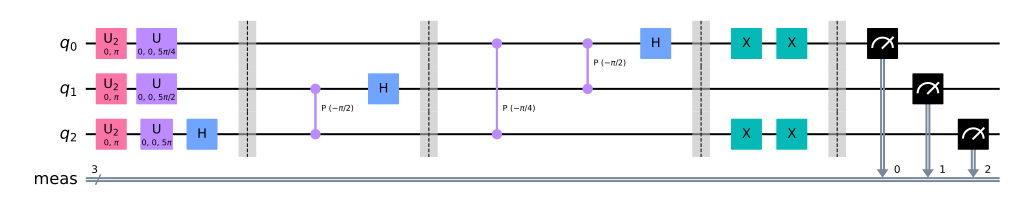

In [9]:
qc3 = inverse_qft(qc2, nqubits)
qc3.x(0)
qc3.x(2)
qc3.measure_all()
qc3.draw()

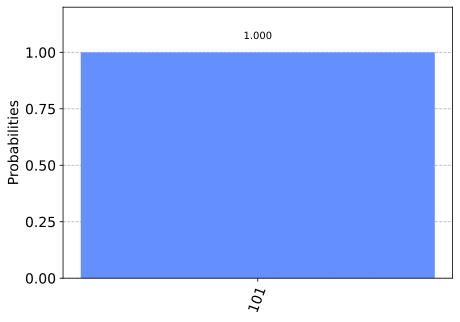

In [10]:
sim = Aer.get_backend("aer_simulator")
qobj3 = assemble(qc3)
result = sim.run(qobj3).result()
plot_histogram(result.get_counts())

In [11]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_manila


In [12]:
shots = 2048
transpiled_qc = transpile(qc3, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


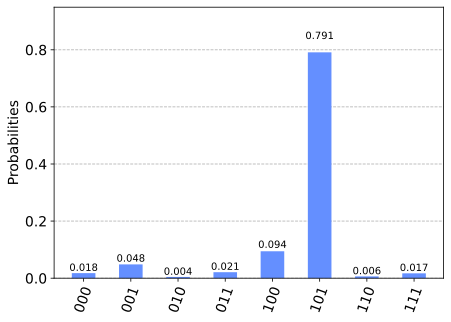

In [13]:
counts = job.result().get_counts()
plot_histogram(counts)

## QuantumCircuit.append(qc, qubits)

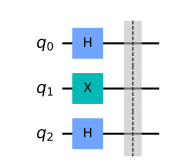

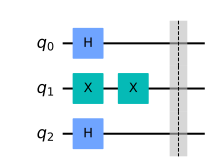

In [36]:
qc1_temp = QuantumCircuit(3)
qc1_temp.h(0)
qc1_temp.x(1)
qc1_temp.h(2)
qc1_temp.barrier()
display(qc1_temp.draw())

qc2_temp = QuantumCircuit(3)
qc2_temp.h(0)
qc2_temp.x(1)
qc2_temp.h(2)
qc2_temp.x(1)
qc2_temp.barrier()
display(qc2_temp.draw())

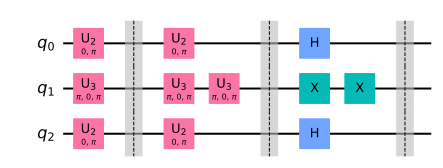

In [38]:
qc1_temp.append(qc2_temp, qc1_temp.qubits[:3])
qc1_temp.decompose().draw()

QuantumCircuit.append(qc, qubits)
- qc: 뒤에다가 붙일 양자 회로
- qubis: 시작점에 넣을 큐비트들

Decompose